In [1]:
import numpy as np
import pandas as pd
from math import sqrt
from scipy import interp
import matplotlib.pyplot as plt

# Loading Data

In [2]:
dataset = pd.DataFrame.from_csv('secondryFeatures.csv')
dataset.head()

,ProblemID,NSubmissions,Diff_Prob_Ini,Diff_Prob_Fin,Exp_Prob_GradeDiff,logTimeSinceFirst,NVideoEvents,NForumEvents,NumberOfUpvotes,ForumActivity,NumberOfThreadViews,DurationOfVideoActivity,Performance,Exp_Prob_Perf
index,,,,,,,,,,,,,,
0009e7ff2e6bad5d80640eeb61cd6e0d_1,1,2,54.034810,80.551160,12.695707,8.970178,0.0,0.0,0.0,0.0,0.0,0.0,25.000000,25.391414
0009e7ff2e6bad5d80640eeb61cd6e0d_11,11,15,49.730917,93.739703,7.738509,78.390556,0.0,30.0,0.0,0.0,14.0,0.0,44.444444,116.077636
0009e7ff2e6bad5d80640eeb61cd6e0d_14,14,22,39.823853,89.807951,4.592268,117.026488,0.0,12.0,0.0,0.0,6.0,0.0,100.000000,101.029894
0009e7ff2e6bad5d80640eeb61cd6e0d_15,15,1,64.526112,93.288201,6.722423,4.736198,0.0,0.0,0.0,0.0,0.0,0.0,20.000000,6.722423
0009e7ff2e6bad5d80640eeb61cd6e0d_3,3,1,79.081401,84.959072,7.253086,5.552960,0.0,0.0,0.0,0.0,0.0,0.0,16.666667,7.253086


Setting Dataset and Performance labels

In [3]:
Y = dataset.Performance 
X = dataset.drop('Performance', 1)
print(X.shape)

(5850, 13)


# Regression

Declare a function to plot training and testing RSME with 5-fold cross validation

In [4]:
#Imports
from itertools import cycle
from sklearn.metrics import mean_squared_error
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from scipy import stats
import copy

# rms = sqrt(mean_squared_error(y_actual, y_predicted)) Example of RMSE

# Funciton definiton
def rmse(y_, y_hat):
    return sqrt(mean_squared_error(y_, y_hat))

def ploting_rmse(classifier, X, Y, normalize = False ):
    number_fold = 5
    cv = StratifiedKFold(n_splits = number_fold, shuffle=True)

    colors = cycle(['cyan', 'indigo', 'seagreen', 'yellow', 'blue', 'darkorange','orange', 'red', 'purple', 'magenta'])
    if normalize:
        X = pd.DataFrame(stats.zscore(X), index = X.index, columns = X.columns)
    test_rmse = []
    train_rmse = []
    i = 0
    for (train, test) in cv.split(X, Y):       
        classifier.fit(X.iloc[train], Y.iloc[train])
        train_rmse.append(rmse(Y.iloc[train],
                              classifier.predict(X.iloc[train])))
        test_rmse.append(rmse(Y.iloc[test],
                              classifier.predict(X.iloc[test])))
        i+=1
        
    t = np.linspace(0, 2 * max(max(train_rmse), max(test_rmse)),number_fold)
    plt.plot( train_rmse, color='r', label = 'Train RSME') # plotting t,a separately 
    plt.plot( test_rmse, color='g', label = 'Test RSME') # plotting t,b separately 
    plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
    plt.show()
    np_train =  np.array(train_rmse)
    np_test = np.array(test_rmse) 
    print('Mean Training RMSE:', np.mean(np_train, axis = 0) ,
          ' SDT Training RMSE:', np.std(np_train, axis = 0),
          '\nMean Testing RMSE:', np.mean(np_test, axis = 0) ,
          ' SDT Testing RMSE:', np.std(np_test, axis = 0),)

Declare a function to plot learning curve with 5-fold cross validation

In [5]:
from sklearn.model_selection import learning_curve
def learning_curve_plot(nn, X, Y, EIL = True):    
    #Learning curve
    train_sizes, train_scores, test_scores = learning_curve(nn, X, Y,
                                                            train_sizes=np.array([ 0.1, 0.33, 0.55, 0.78, 1. ]),
                                                            cv=5,  
                                                            scoring='neg_mean_absolute_error', 
                                                            exploit_incremental_learning = EIL)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    plt.show()

#### RMSE( Y - Exp_Prob_Perf)

This represents our baseline (Exp_Prob_Perf stands for Expected Problem Performance, and it is computing by multiplying the expected gradiff in a submission to a problem for the number of submission).

In [6]:
rmse(Y, X.Exp_Prob_Perf)

62.275300582340435

### 1) Linaer Regressor
#### 1.1) RMSE Ploting

Linear Regression with: fit_intercept = True, normalize = False


C:\Users\dunay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:579: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


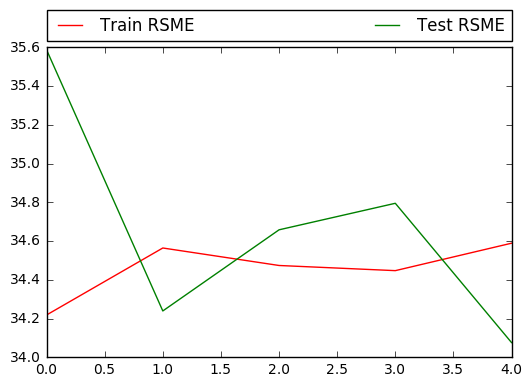

Mean Training RMSE: 34.4592738761  SDT Training RMSE: 0.131270314286 
Mean Testing RMSE: 34.6717844868  SDT Testing RMSE: 0.528286806353


In [7]:
from sklearn.linear_model import LinearRegression
print('Linear Regression with: fit_intercept = True, normalize = False')
LR = LinearRegression(fit_intercept = True,
                      normalize = False, 
                      copy_X=True, 
                      n_jobs=1)

ploting_rmse(LR, X, Y)


#### 1.2) Learning curve

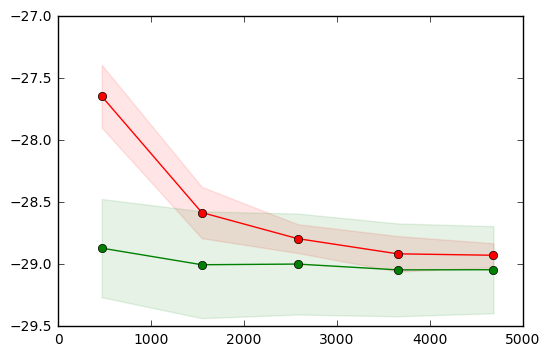

In [8]:
learning_curve_plot(LR, X, Y, EIL = False)

### 2) Random Forest Regressor
#### 2.1) RMSE Ploting

C:\Users\dunay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:579: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


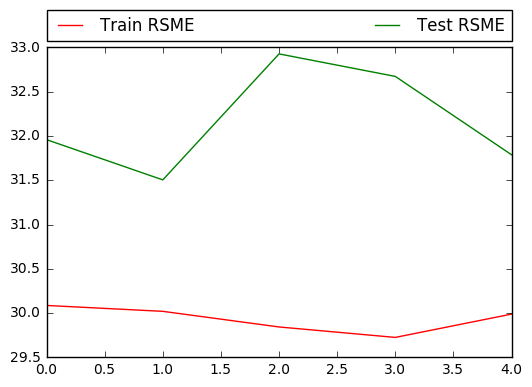

Mean Training RMSE: 29.9334443971  SDT Training RMSE: 0.130603053572 
Mean Testing RMSE: 32.1704041297  SDT Testing RMSE: 0.540218121527


In [9]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(n_estimators=200, 
                           max_depth=7)
ploting_rmse(RF, X, Y)


#### 2.2) Learning Curve

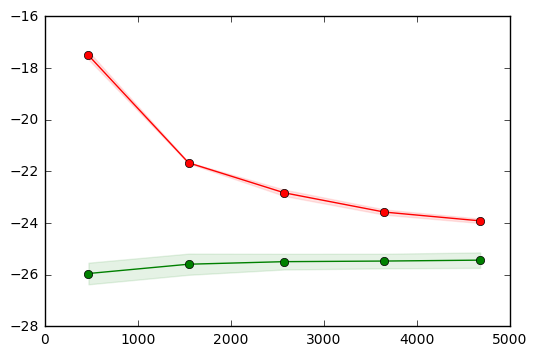

In [10]:
learning_curve_plot(RF, X, Y, EIL = False)

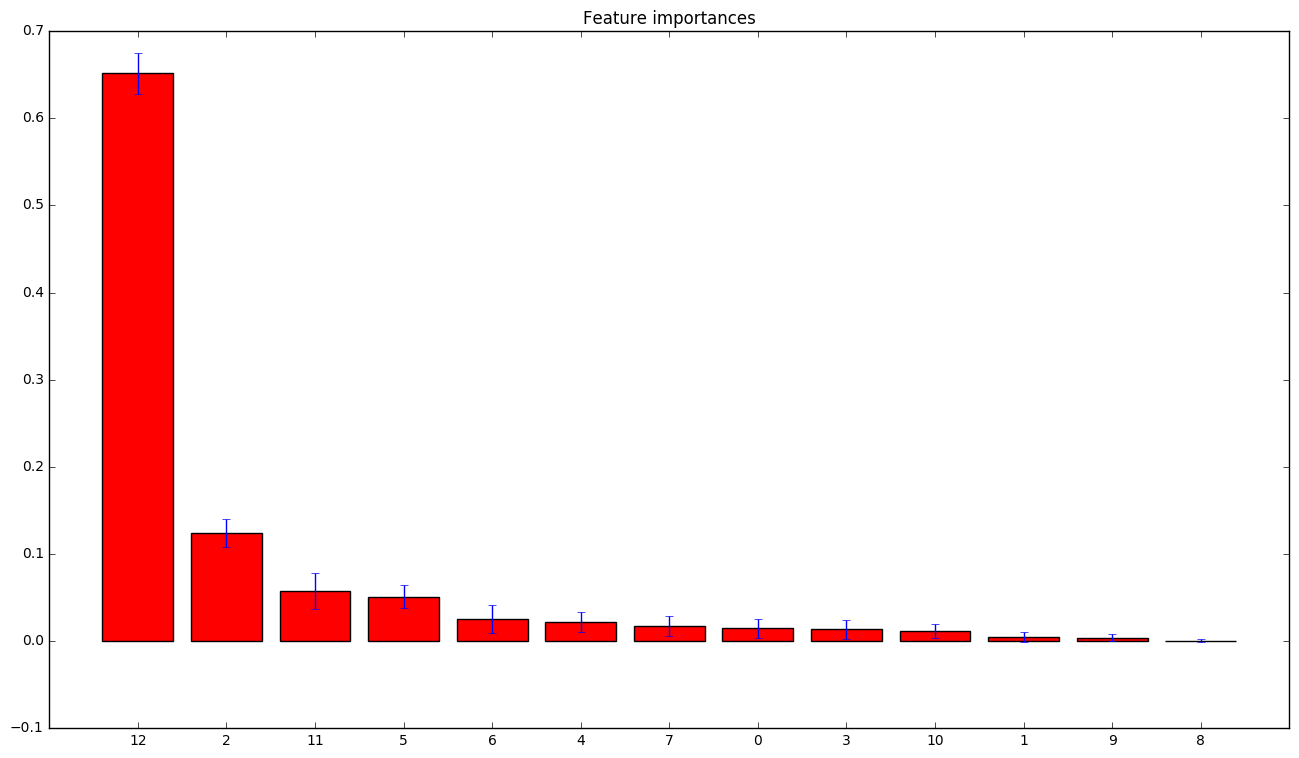

In [11]:
#Feature Importance

RF.fit(X,Y)
importances = RF.feature_importances_
std = np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = np.argsort(importances)[::-1]


# Plot the feature importances of the forest
f = np.asarray(X.columns.tolist())

plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
fig = plt.gcf()
fig.set_size_inches(16, 9)
plt.show()

In [12]:
f[[indices]]

array(['Exp_Prob_Perf', 'Diff_Prob_Ini', 'DurationOfVideoActivity',
       'logTimeSinceFirst', 'NVideoEvents', 'Exp_Prob_GradeDiff',
       'NForumEvents', 'ProblemID', 'Diff_Prob_Fin', 'NumberOfThreadViews',
       'NSubmissions', 'ForumActivity', 'NumberOfUpvotes'], 
      dtype='<U23')

We see that our baseline is already very good, we will be using this instead of diff prob ini as they are complimentary. We also notice that the "DunaritonOfVideoActivity has a high importance, but this is due to the numbers been much bigger, rather than true contribution.

Now we check with only 3 variables that we know to be rather independent:

In [33]:
X_1 = X[['Exp_Prob_Perf', 'Diff_Prob_Ini', 'logTimeSinceFirst','NVideoEvents','NForumEvents']]

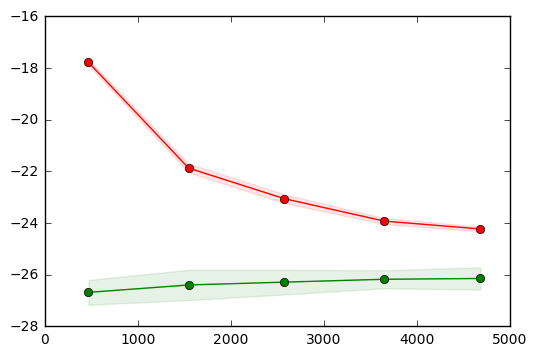

In [14]:
learning_curve_plot(RF, X_1, Y, EIL = False)

We see how only 4 features can characterize the model to almost the same precission, and hopefuly generalize better.

### 3) Neuronal Network Regressor
#### 3.1) RMSE Ploting

C:\Users\dunay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:579: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


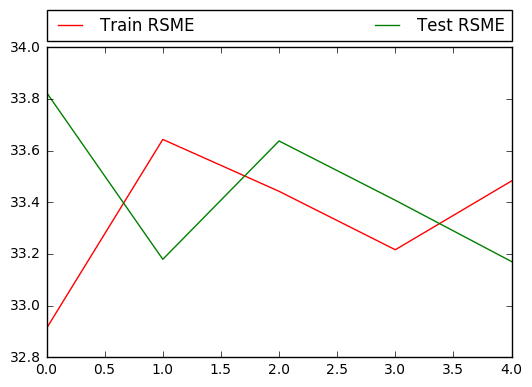

Mean Training RMSE: 33.3399790395  SDT Training RMSE: 0.25342236005 
Mean Testing RMSE: 33.4445896902  SDT Testing RMSE: 0.256349328653


In [15]:
from sklearn.neural_network import MLPRegressor
NN = MLPRegressor(activation = 'logistic', 
                                  hidden_layer_sizes = (500, ),
                                  learning_rate_init = 0.04, 
                                  learning_rate = 'adaptive',
                                  tol = 1e-10, batch_size = 200)
ploting_rmse(NN, X, Y)

#### 3.2) Learning Curve

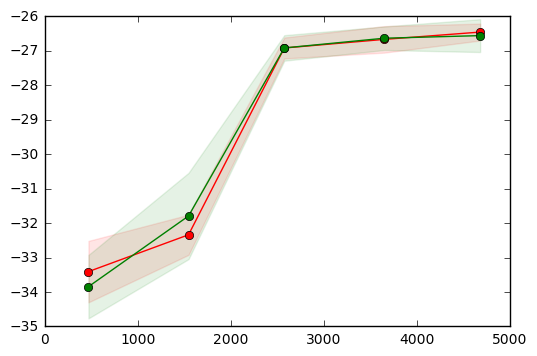

In [16]:
learning_curve_plot(NN, stats.zscore(X), Y, EIL= True)

### 4) K - Nearest Neigbours (K-NN) Regressor
#### 4.1) RMSE Ploting

C:\Users\dunay\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:579: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of groups for any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


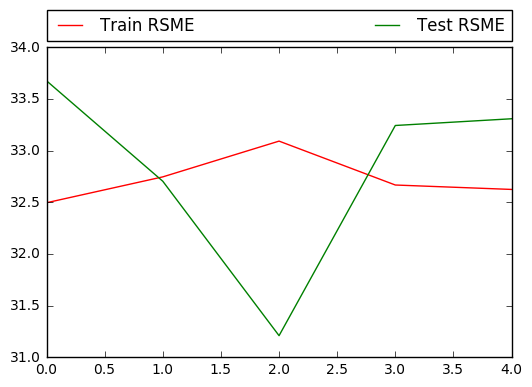

Mean Training RMSE: 32.7265647077  SDT Training RMSE: 0.200589503673 
Mean Testing RMSE: 32.8295116035  SDT Testing RMSE: 0.866842105601


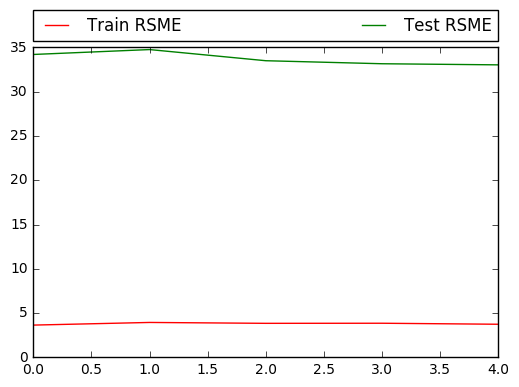

Mean Training RMSE: 3.81283369306  SDT Training RMSE: 0.102936952627 
Mean Testing RMSE: 33.7325260354  SDT Testing RMSE: 0.655886726821


In [17]:
from sklearn import neighbors
n_neighbors = 201

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    ploting_rmse(knn, X, Y)

#### 4.2) Learning Curve

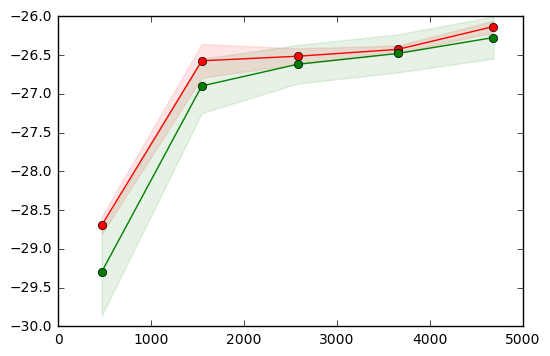

In [18]:
KNN = neighbors.KNeighborsRegressor(n_neighbors, weights='uniform')
learning_curve_plot(KNN, X, Y, False)

### Perfecting scores and summary

A simple trick to improve the precission of our regressor is to apply bounds to the scores. We know that a score higher that 100 is impossible to achieve, so everything that is predicted over 100 should be cut down to the limit.

In [34]:
from sklearn.model_selection import train_test_split
X_tr, X_te, y_tr, y_te = train_test_split(X, Y, test_size=0.20, random_state=42)
X_tr5, X_te5, y_tr5, y_te5 = train_test_split(X_1, Y, test_size=0.20, random_state=42)

In [61]:
classifiers = [LR, RF, NN, KNN]
names = ['Linear', 'RandomForest', 'Neuronal', 'KNeighbours']
for classifier, name in zip(classifiers, names):
    classifier.fit(X_tr, y_tr)
    prediction_te = classifier.predict(X_te)
    prediction_tr = classifier.predict(X_tr)
    prediction_te = [min([100,aux]) for aux in prediction_te]
    prediction_tr = [min([100,aux]) for aux in prediction_tr]
    print('Train RMSE for ' + name + '(full + corrected):')
    print(rmse(y_tr, prediction_tr))
    print('Test RMSE for ' + name + '(full + corrected):')
    print(rmse(y_te, prediction_te))

Train RMSE for Linear(full + corrected):
34.47319480026375
Test RMSE for Linear(full + corrected):
33.023678791973765
Train RMSE for RandomForest(full + corrected):
30.239405453454953
Test RMSE for RandomForest(full + corrected):
30.549315659104433
Train RMSE for Neuronal(full + corrected):
33.64270097387529
Test RMSE for Neuronal(full + corrected):
32.00483823199678
Train RMSE for KNeighbours(full + corrected):
33.003170026517736
Test RMSE for KNeighbours(full + corrected):
31.43193200790956


In [62]:
classifiers = [LR, RF, NN, KNN]
names = ['Linear', 'RandomForest', 'Neuronal', 'KNeighbours']
for classifier, name in zip(classifiers, names):
    classifier.fit(X_tr5, y_tr5)
    prediction_te = classifier.predict(X_te5)
    prediction_tr = classifier.predict(X_tr5)
    prediction_te = [min([100,aux]) for aux in prediction_te]
    prediction_tr = [min([100,aux]) for aux in prediction_tr]
    print('Train RMSE for ' + name + '(5-select + corrected):')
    print(rmse(y_tr, prediction_tr))
    print('Test RMSE for ' + name + '(5-select + corrected):')
    print(rmse(y_te, prediction_te))

Train RMSE for Linear(5-select + corrected):
34.78031168776583
Test RMSE for Linear(5-select + corrected):
33.28530097724505
Train RMSE for RandomForest(5-select + corrected):
30.38465687574426
Test RMSE for RandomForest(5-select + corrected):
30.609959792631667
Train RMSE for Neuronal(5-select + corrected):
32.78597707146105
Test RMSE for Neuronal(5-select + corrected):
31.350909051081455
Train RMSE for KNeighbours(5-select + corrected):
32.625508047759844
Test RMSE for KNeighbours(5-select + corrected):
31.1157482968283


In [59]:
#Meta-Model
predicted_te = list()
predicted_tr = list()
classifiers = [RF, NN, KNN]
names = ['RandomForest', 'Neuronal', 'KNeighbours']
for classifier, name in zip(classifiers, names):
    classifier.fit(X_tr, y_tr)
    prediction_te = classifier.predict(X_te)
    prediction_tr = classifier.predict(X_tr)
    predicted_tr.append(prediction_tr)
    predicted_te.append(prediction_te)
    
Y_predicted_tr = np.mean(np.array(predicted_tr),0)
Y_predicted_te = np.mean(np.array(predicted_te),0)
Y_predicted_te = [min([100,aux]) for aux in Y_predicted_te]
Y_predicted_tr = [min([100,aux]) for aux in Y_predicted_tr]
    
print('Train RMSE for  meta-model (ALL + corrected):')
print(rmse(y_tr, Y_predicted_tr))
print('Test RMSE for  meta-model (ALL + corrected):')
print(rmse(y_te, Y_predicted_te))

Train RMSE for  meta-model (ALL + corrected):
31.85882299382473
Test RMSE for  meta-model (ALL + corrected):
30.877498824244118


In [60]:
#Meta-Model
predicted_te = list()
predicted_tr = list()
classifiers = [RF, NN, KNN]
names = ['RandomForest', 'Neuronal', 'KNeighbours']
for classifier, name in zip(classifiers, names):
    classifier.fit(X_tr5, y_tr5)
    prediction_te = classifier.predict(X_te5)
    prediction_tr = classifier.predict(X_tr5)
    predicted_tr.append(prediction_tr)
    predicted_te.append(prediction_te)
    
Y_predicted_tr = np.mean(np.array(predicted_tr),0)
Y_predicted_te = np.mean(np.array(predicted_te),0)
Y_predicted_te = [min([100,aux]) for aux in Y_predicted_te]
Y_predicted_tr = [min([100,aux]) for aux in Y_predicted_tr]

print('Train RMSE for  meta-model (5 selected + corrected):')
print(rmse(y_tr5, Y_predicted_tr))
print('Test RMSE for  meta-model (5 selected + corrected):')
print(rmse(y_te5, Y_predicted_te))

Train RMSE for  meta-model (5 selected + corrected):
31.632882535932538
Test RMSE for  meta-model (5 selected + corrected):
30.76889007958236


### Save progress

In [63]:
X_test = pd.DataFrame.from_csv('secondryFeatures_test.csv')
X_user_test = pd.DataFrame.from_csv('regression_template.csv')
X_test.head()

,ProblemID,NSubmissions,Diff_Prob_Ini,Diff_Prob_Fin,Exp_Prob_GradeDiff,logTimeSinceFirst,NVideoEvents,NForumEvents,NumberOfUpvotes,ForumActivity,NumberOfThreadViews,DurationOfVideoActivity,Exp_Prob_Perf
index,,,,,,,,,,,,,
000143a7618ac9cae91b0bf7d059c1fd_4,4,2,40.927461,87.606218,12.247145,10.418853,0.0,0.0,0.0,0.0,0.0,0.0,24.494290
000143a7618ac9cae91b0bf7d059c1fd_5,5,13,49.257932,85.833001,9.146499,70.016082,0.0,0.0,0.0,0.0,0.0,0.0,118.904492
000143a7618ac9cae91b0bf7d059c1fd_6,6,2,73.817374,79.443807,7.666016,13.563180,0.0,0.0,0.0,0.0,0.0,0.0,15.332031
000143a7618ac9cae91b0bf7d059c1fd_7,7,2,48.199768,94.878049,15.135576,12.056760,0.0,0.0,0.0,0.0,0.0,0.0,30.271152
0019bbc70f71e4620273237a1e99bfde_1,1,2,54.034810,80.551160,12.695707,22.519414,196.0,0.0,0.0,0.0,0.0,977978.0,25.391414


In [64]:
dataset_test = X_test.ix[X_user_test.index.values,:]
dataset_test_ = dataset_test[['Exp_Prob_Perf','Diff_Prob_Ini', 'logTimeSinceFirst','NVideoEvents','NForumEvents']]

In [65]:
dataset_test.shape

(3767, 13)

In [68]:
classifiers = [RF, NN, KNN]
names = ['RandomForest', 'Neuronal', 'KNeighbours']
for classifier, name in zip(classifiers, names):
    classifier.fit(X, Y)
    prediction = classifier.predict(dataset_test)
    prediction = [min([100,aux]) for aux in prediction]
    X_user_test['overalGradeDiff'] = prediction
    X_user_test.reset_index().to_csv(path_or_buf='predictions_'+name+'_regression.csv', sep=',', index=False, quoting=1)

In [69]:
for classifier, name in zip(classifiers, names):
    classifier.fit(X_1, Y)
    prediction = classifier.predict(dataset_test_)
    prediction = [min([100,aux]) for aux in prediction]
    X_user_test['overalGradeDiff'] = prediction
    X_user_test.reset_index().to_csv(path_or_buf='predictions_'+name+'5_regression.csv', sep=',', index=False, quoting=1)

In [70]:
#Meta-Model
predicted_te = list()
classifiers = [RF, NN, KNN]
names = ['RandomForest', 'Neuronal', 'KNeighbours']
for classifier, name in zip(classifiers, names):
    classifier.fit(X, Y)
    prediction_te = classifier.predict(dataset_test)
    predicted_te.append(prediction_te)
    
Y_predicted_te = np.mean(np.array(predicted_te),0)
Y_predicted_te = [min([100,aux]) for aux in Y_predicted_te]
X_user_test['overalGradeDiff'] = Y_predicted_te

X_user_test.reset_index().to_csv(path_or_buf='predictions_meta_regression.csv', sep=',', index=False, quoting=1)

In [71]:
#Meta-Model 5
predicted_te = list()
classifiers = [RF, NN, KNN]
names = ['RandomForest', 'Neuronal', 'KNeighbours']
for classifier, name in zip(classifiers, names):
    classifier.fit(X_1, Y)
    prediction_te = classifier.predict(dataset_test_)
    predicted_te.append(prediction_te)
    
Y_predicted_te = np.mean(np.array(predicted_te),0)
Y_predicted_te = [min([100,aux]) for aux in Y_predicted_te]
X_user_test['overalGradeDiff'] = Y_predicted_te

X_user_test.reset_index().to_csv(path_or_buf='predictions_meta5_regression.csv', sep=',', index=False, quoting=1)